In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
defaulter_df = pd.read_csv("feed (1).csv")

# Strip any extra whitespace in column names
defaulter_df.columns = defaulter_df.columns.str.strip()

# Print basic info
print("Size of the data : ", defaulter_df.shape)
print("Column names:", defaulter_df.columns)
print(defaulter_df.info())
print(defaulter_df.describe())

# Create label based on multiple conditions (Option 2)
# Condition: soilMoisture < 1 and Light Intensity > 1 → label = 1 (e.g., needs irrigation), else 0
# Example: mark as “needs irrigation” if soilMoisture < 1 OR light intensity low
defaulter_df["label"] = (
    (defaulter_df["soilMoisture"] < 1) |
    (defaulter_df["Light Intensity"] == 0)
).astype(int)
print(defaulter_df["label"].value_counts())

# Show target variable distribution
print("Target variable frequency distribution : \n", defaulter_df["label"].value_counts())


C:\Users\tanis\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Size of the data :  (97, 7)
Column names: Index(['created_at', 'entry_id', 'soilMoisture', 'fTemperature', 'Water Flow',
       'Water Level', 'Light Intensity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       97 non-null     object 
 1   entry_id         97 non-null     int64  
 2   soilMoisture     97 non-null     int64  
 3   fTemperature     97 non-null     float64
 4   Water Flow       97 non-null     float64
 5   Water Level      97 non-null     int64  
 6   Light Intensity  97 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 5.4+ KB
None
        entry_id  soilMoisture  fTemperature  Water Flow  Water Level  \
count  97.000000     97.000000     97.000000        97.0         97.0   
mean   49.000000      0.701031     25.002062         2.5          1.0   
std    28.145

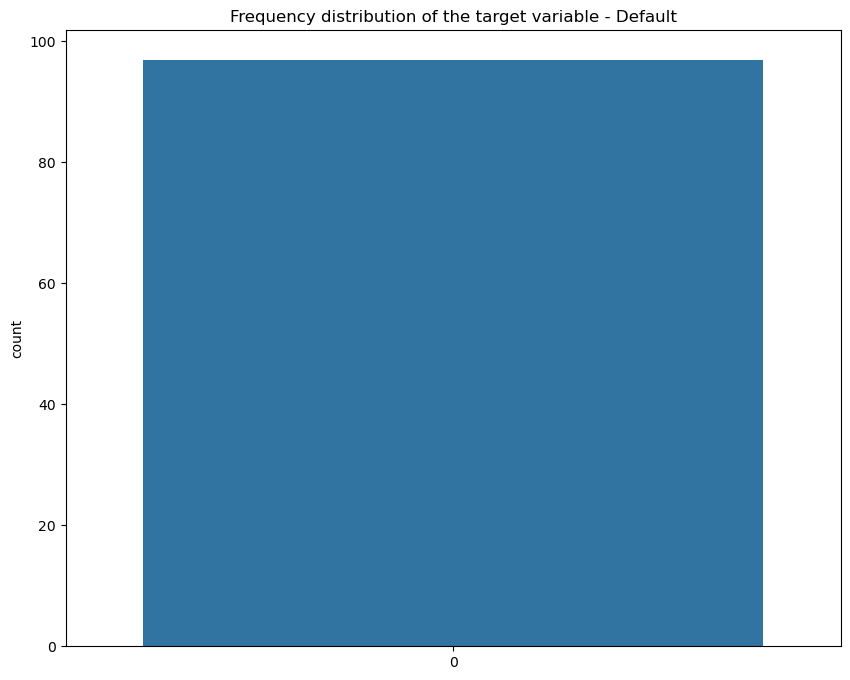

In [2]:
plt.figure(figsize = (10,8))
sns.countplot(defaulter_df["fTemperature"])
plt.title("Frequency distribution of the target variable - Default")
plt.show()

In [3]:
defaulter_df.describe()

,entry_id,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity,label
count,97.000000,97.000000,97.000000,97.0,97.0,97.000000,97.000000
mean,49.000000,0.701031,25.002062,2.5,1.0,0.680412,0.628866
std,28.145456,0.914751,0.286131,0.0,0.0,0.907680,0.485618
min,1.000000,0.000000,24.500000,2.5,1.0,0.000000,0.000000
25%,25.000000,0.000000,24.800000,2.5,1.0,0.000000,0.000000
50%,49.000000,0.000000,25.000000,2.5,1.0,0.000000,1.000000
75%,73.000000,2.000000,25.200000,2.5,1.0,2.000000,1.000000
max,97.000000,2.000000,25.400000,2.5,1.0,2.000000,1.000000


In [4]:
defaulter_df.head(10)

,created_at,entry_id,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity,label
0,2025-06-09 08:20:15 UTC,1,0,24.7,2.5,1,0,1
1,2025-06-09 08:20:45 UTC,2,0,25.0,2.5,1,0,1
2,2025-06-09 08:21:15 UTC,3,0,25.3,2.5,1,0,1
3,2025-06-09 08:21:30 UTC,4,0,24.8,2.5,1,0,1
4,2025-06-09 08:22:00 UTC,5,0,25.1,2.5,1,0,1
5,2025-06-09 08:22:30 UTC,6,0,24.5,2.5,1,0,1
6,2025-06-09 08:22:45 UTC,7,0,25.0,2.5,1,0,1
7,2025-06-09 08:23:15 UTC,8,0,24.6,2.5,1,0,1
8,2025-06-09 08:23:45 UTC,9,0,24.9,2.5,1,0,1
9,2025-06-09 08:24:00 UTC,10,0,25.4,2.5,1,0,1


In [5]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
label_distribution = defaulter_df['label'].value_counts()
print(label_distribution)

label
1    61
0    36
Name: count, dtype: int64


In [6]:
print("Target variable frequency distribution : \n", defaulter_df["label"].value_counts())

Target variable frequency distribution : 
 label
1    61
0    36
Name: count, dtype: int64


In [7]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (97, 8)


In [8]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across team, position, and all_star columns
defaulter_df[['label']] = defaulter_df[['label']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
print(defaulter_df)

                 created_at  entry_id  soilMoisture  fTemperature  Water Flow  \
0   2025-06-09 08:20:15 UTC         1             0          24.7         2.5   
1   2025-06-09 08:20:45 UTC         2             0          25.0         2.5   
2   2025-06-09 08:21:15 UTC         3             0          25.3         2.5   
3   2025-06-09 08:21:30 UTC         4             0          24.8         2.5   
4   2025-06-09 08:22:00 UTC         5             0          25.1         2.5   
..                      ...       ...           ...           ...         ...   
92  2025-06-09 08:59:11 UTC        93             0          24.7         2.5   
93  2025-06-09 08:59:26 UTC        94             2          25.1         2.5   
94  2025-06-09 08:59:41 UTC        95             2          25.2         2.5   
95  2025-06-09 09:00:11 UTC        96             1          24.8         2.5   
96  2025-06-09 09:00:26 UTC        97             2          25.4         2.5   

    Water Level  Light Inte

In [9]:
cn = defaulter_df.select_dtypes(include='number').corr()
cn


,entry_id,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity,label
entry_id,1.000000,0.623072,-0.058465,NaN,NaN,0.601423,-0.608937
soilMoisture,0.623072,1.000000,-0.033439,NaN,NaN,0.912469,-0.932414
fTemperature,-0.058465,-0.033439,1.000000,NaN,NaN,-0.013480,-0.001932
Water Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Light Intensity,0.601423,0.912469,-0.013480,NaN,NaN,1.000000,-0.957220
label,-0.608937,-0.932414,-0.001932,NaN,NaN,-0.957220,1.000000


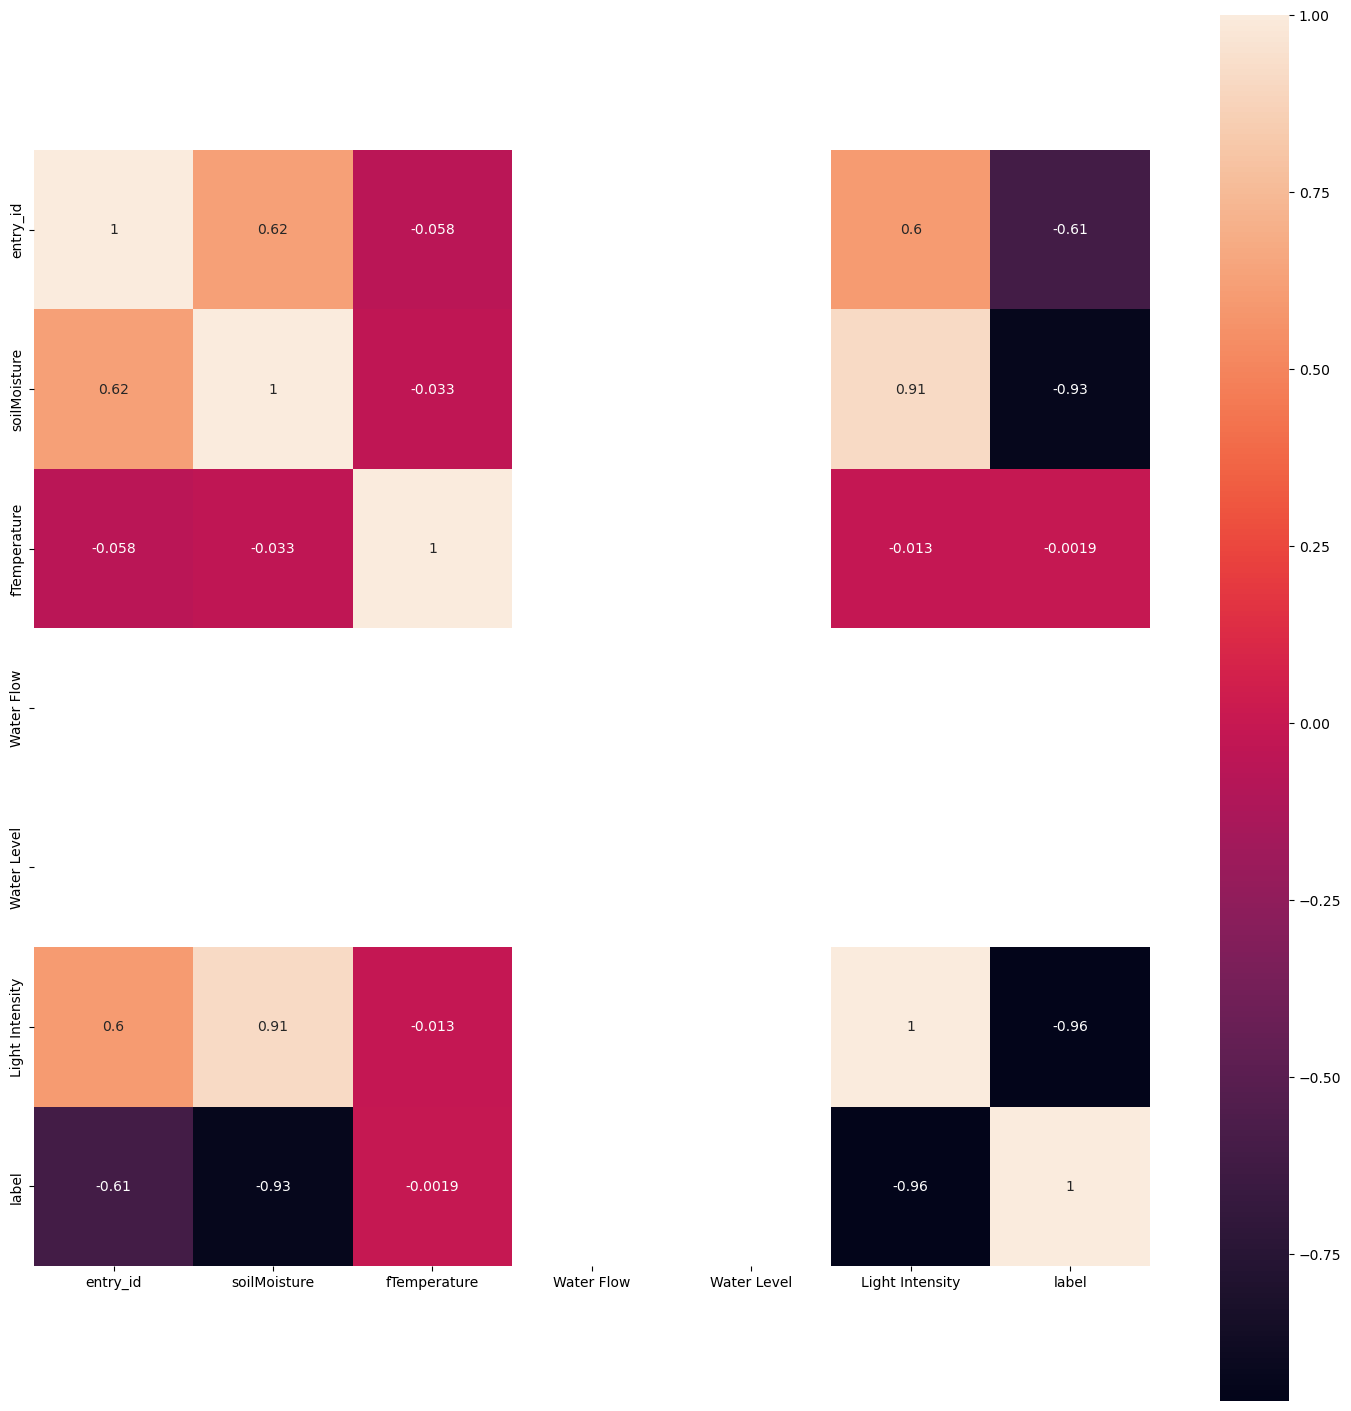

In [10]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,annot=True, square=True)
plt.show()

In [11]:
print("Target variable frequency distribution : \n", defaulter_df["label"].value_counts())

Target variable frequency distribution : 
 label
1    61
0    36
Name: count, dtype: int64


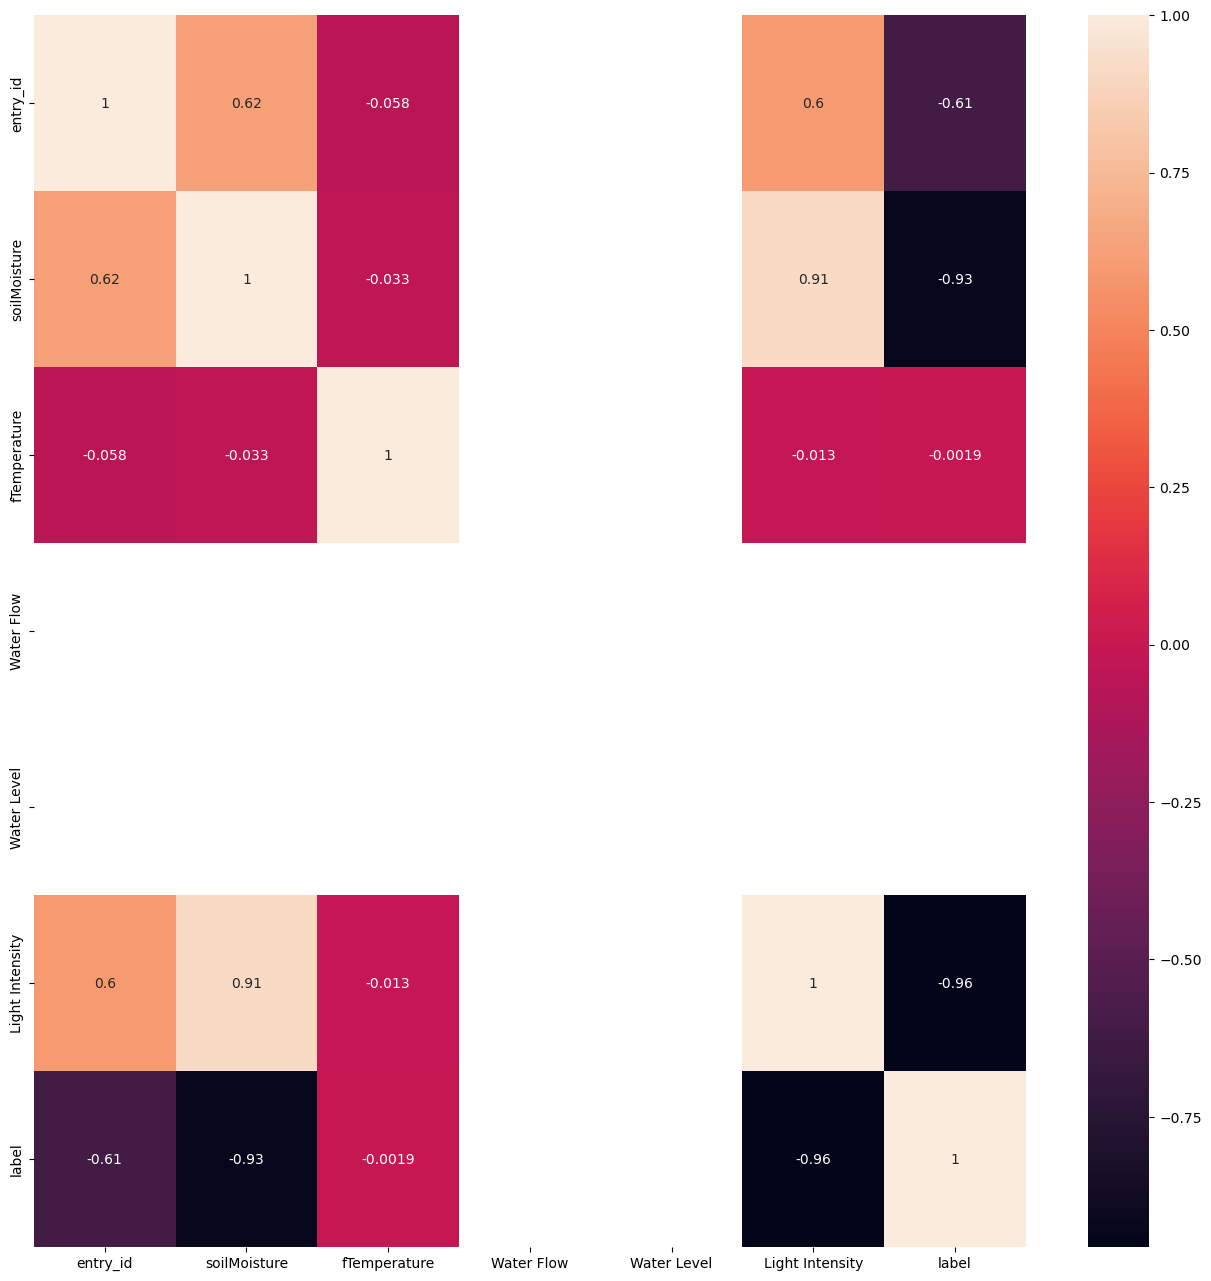

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize = (16,16))
sns.heatmap(cn, annot = True)
plt.show()
plt.savefig('my_plot4.png')

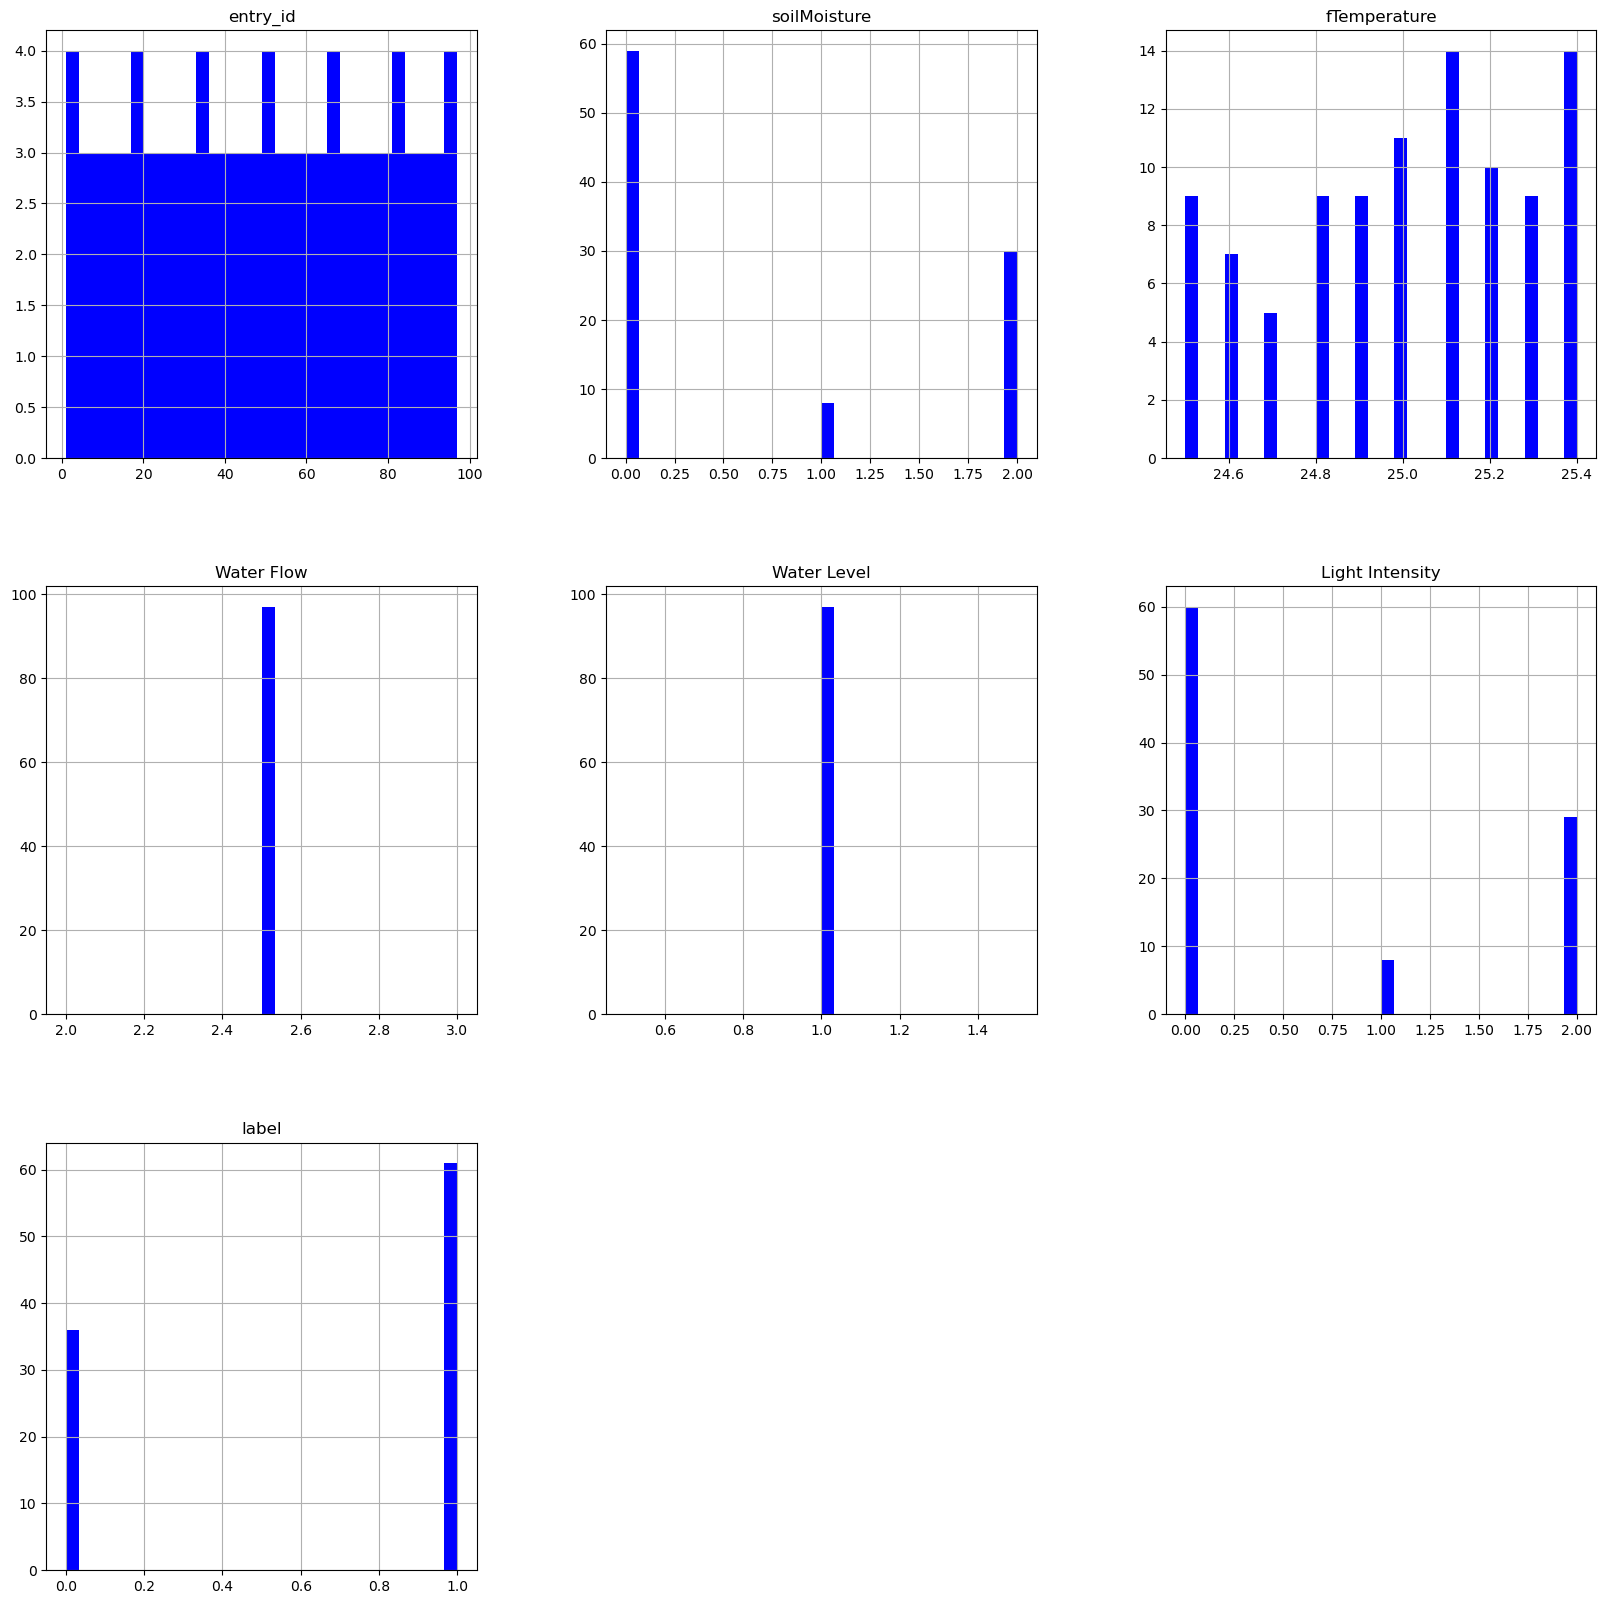

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\my_plot5.png'

<Figure size 640x480 with 0 Axes>

In [43]:
from urllib.request import urlretrieve
defaulter_df.hist(bins = 30, figsize = (20,20), color = 'b')
plt.show()
plt.savefig('C:\\Users\\Admin\\Desktop\\my_plot5.png')
#urlretrieve('image.png', 'downloaded_image.png')

In [44]:
cn1 = defaulter_df.select_dtypes(include='number').corr()
cn1


,entry_id,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity,label
entry_id,1.000000,0.623072,-0.058465,NaN,NaN,0.601423,-0.608937
soilMoisture,0.623072,1.000000,-0.033439,NaN,NaN,0.912469,-0.932414
fTemperature,-0.058465,-0.033439,1.000000,NaN,NaN,-0.013480,-0.001932
Water Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Light Intensity,0.601423,0.912469,-0.013480,NaN,NaN,1.000000,-0.957220
label,-0.608937,-0.932414,-0.001932,NaN,NaN,-0.957220,1.000000


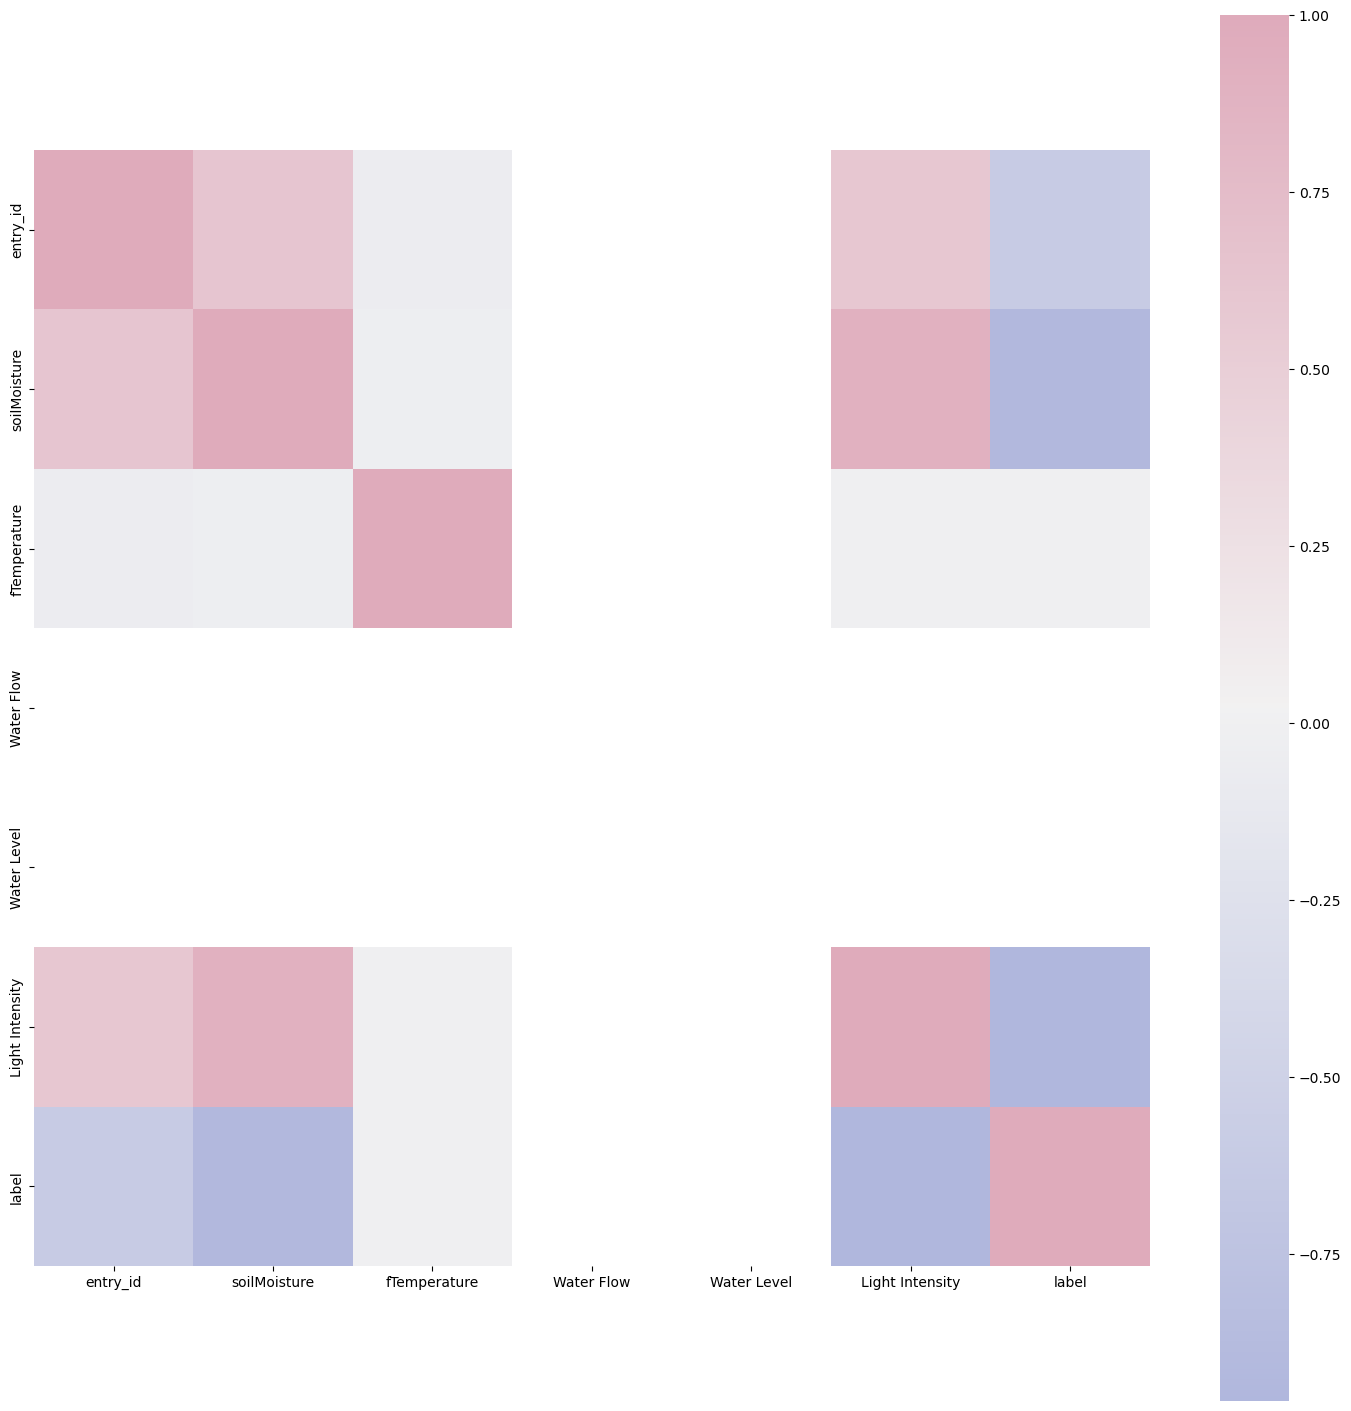

In [45]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn1,cmap=cmap,annot=False, square=True)
plt.show()

In [46]:
# First clean column names
defaulter_df.columns = defaulter_df.columns.str.strip()

# Define features and target
X = defaulter_df[["soilMoisture", "fTemperature", "Water Flow", "Water Level", "Light Intensity"]]
y = defaulter_df["label"]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  67
Size of test data :  30


In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed

array([[1.        , 0.88888889, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.66666667, 0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ],
       [1.        , 0.33333333, 0.        , 0.        , 1.        ],
       [1.        , 0.11111111, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.44444444, 0.        , 0.        , 0.        ],
       [0.        , 0.22222222, 0.        , 0.        , 0.        ],
       [0.        , 0.55555556, 0.        , 0.        , 0.        ],
       [0.5       , 1.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ],
       [0.        , 0.88888889, 0.

In [49]:
X_train["soilMoisture_normalized"] = train_transformed[:, 0]
X_train["fTemperature_normalized"] = train_transformed[:, 1]
X_train["Water_Flow_normalized"] = train_transformed[:, 2]
X_train["Water_Level_normalized"] = train_transformed[:, 3]
X_train["Light_Intensity_normalized"] = train_transformed[:, 4]
X_test.head()

,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity
62,2,25.3,2.5,1,2
40,0,24.5,2.5,1,0
93,2,25.1,2.5,1,2
18,0,25.1,2.5,1,0
81,2,24.8,2.5,1,2


In [50]:
X_test["soilMoisture_normalized"] = transformed[:, 0]
X_test["fTemperature_normalized"] = transformed[:, 1]
X_test["Water_Flow_normalized"] = transformed[:, 2]
X_test["Water_Level_normalized"] = transformed[:, 3]
X_test["Light_Intensity_normalized"] = transformed[:, 4]

X_test.head()

,soilMoisture,fTemperature,Water Flow,Water Level,Light Intensity,soilMoisture_normalized,fTemperature_normalized,Water_Flow_normalized,Water_Level_normalized,Light_Intensity_normalized
62,2,25.3,2.5,1,2,1.0,0.888889,0.0,0.0,1.0
40,0,24.5,2.5,1,0,0.0,0.000000,0.0,0.0,0.0
93,2,25.1,2.5,1,2,1.0,0.666667,0.0,0.0,1.0
18,0,25.1,2.5,1,0,0.0,0.666667,0.0,0.0,0.0
81,2,24.8,2.5,1,2,1.0,0.333333,0.0,0.0,1.0


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Strip extra spaces from column names (do this once)
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

# Fit using actual column names from your dataset
features = ["soilMoisture", "fTemperature", "Water Flow", "Water Level", "Light Intensity"]
knn.fit(X_train[features], y_train)

# Predict
predictions = knn.predict(X_test[features])

# Accuracy
test_accuracy = accuracy_score(y_test, predictions)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.9666666666666667


In [53]:
knn =  KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(X_train[["soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"]], y_train)
predictions = knn.predict(X_test[["soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
print("Test accuracy of Normalized data:", test_accuracy)

Test accuracy of Normalized data: 0.9666666666666667


In [54]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [55]:
print("Original label distribution:")
print(y.value_counts())


Original label distribution:
label
1    61
0    36
Name: count, dtype: int64


In [56]:
from imblearn.under_sampling import RandomUnderSampler
print(X_train.dtypes)
print(X_train.head())


# Keep only numeric columns
X_train_clean = X_train.select_dtypes(include='number')

# Drop rows with NaNs
X_train_clean = X_train_clean.dropna()
y_train_clean = y_train[X_train_clean.index]  # align indices

# Reset index for safety
X_train_clean = X_train_clean.reset_index(drop=True)
y_train_clean = y_train_clean.reset_index(drop=True)

# Now apply undersampling
print("Before undersampling:\n", y_train_clean.value_counts())
under = RandomUnderSampler(random_state=42, replacement=True)
X_under, y_under = under.fit_resample(X_train_clean, y_train_clean)
print("After undersampling:\n", y_under.value_counts())


soilMoisture                    int64
fTemperature                  float64
Water Flow                    float64
Water Level                     int64
Light Intensity                 int64
soilMoisture_normalized       float64
fTemperature_normalized       float64
Water_Flow_normalized         float64
Water_Level_normalized        float64
Light_Intensity_normalized    float64
dtype: object
    soilMoisture  fTemperature  Water Flow  Water Level  Light Intensity  \
95             1          24.8         2.5            1                2   
30             0          25.3         2.5            1                0   
28             0          24.8         2.5            1                0   
87             0          25.1         2.5            1                0   
5              0          24.5         2.5            1                0   

    soilMoisture_normalized  fTemperature_normalized  Water_Flow_normalized  \
95                      0.5                 0.333333                  

In [57]:
print("After undersampling: \n", y_train_clean.value_counts())

After undersampling: 
 label
1    41
0    26
Name: count, dtype: int64


In [58]:
knn =  KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(X_train[["soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"]], y_train)
predictions = knn.predict(X_test[["soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9666666666666667

In [59]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print(X_train.columns.tolist())

log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["soilMoisture_normalized", "fTemperature_normalized", 
                                               "Water_Flow_normalized", "Water_Level_normalized", 
                                               "Light_Intensity_normalized"]])

test_accuracy = accuracy_score(y_test, predictions)
test_accuracy
print(classification_report(y_test,predictions))

['soilMoisture', 'fTemperature', 'Water Flow', 'Water Level', 'Light Intensity', 'soilMoisture_normalized', 'fTemperature_normalized', 'Water_Flow_normalized', 'Water_Level_normalized', 'Light_Intensity_normalized', 'soilMoisture_normalized', 'fTemperature_normalized', 'Water Flow_normalized', 'Water Level_normalized', 'Light Intensity_normalized']
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
print(X_train.columns.tolist())

# Ensure your DataFrames have these columns:
features_norm = [
   "soilMoisture_normalized", "fTemperature_normalized", 
                          "Water_Flow_normalized", "Water_Level_normalized", 
                          "Light_Intensity_normalized"
]

# 1. Initialize
dt_clf_balanced = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# 2. Train
dt_clf_balanced.fit(X_train[features_norm], y_train)

# 3. Predict (use the exact same features)
predictions = dt_clf_balanced.predict(X_test[features_norm])

# 4. Evaluate
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)


['soilMoisture', 'fTemperature', 'Water Flow', 'Water Level', 'Light Intensity', 'soilMoisture_normalized', 'fTemperature_normalized', 'Water_Flow_normalized', 'Water_Level_normalized', 'Light_Intensity_normalized', 'soilMoisture_normalized', 'fTemperature_normalized', 'Water Flow_normalized', 'Water Level_normalized', 'Light Intensity_normalized']
Test Accuracy: 0.9666666666666667


In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Use the normalized features
normalized_features = [f"{col}_normalized" for col in features_to_normalize]

# Initialize and train model
gnb = GaussianNB()
gnb.fit(X_train[normalized_features], y_train)

# Predict
predictions = gnb.predict(X_test[normalized_features])

# Evaluate
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.90      0.95        20

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train[normalized_features], y_train)

# Make predictions on the test data
predictions = svc.predict(X_test[normalized_features])

# Calculate accuracy
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9666666666666667


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train[normalized_features], y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test[normalized_features])
# Calculate accuracy
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9666666666666667


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
features = ["soilMoisture_normalized", "fTemperature_normalized", 
            "Water_Flow_normalized", "Water_Level_normalized", 
            "Light_Intensity_normalized"]

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(
    X=X_train[features].values,
    y=y_train.values
)

predictions = xgb_classifier.predict(X_test[features].values)


# Evaluate accuracy
test_accuracy = accuracy_score(y_test, predictions)
print("XGBoost Test Accuracy:", test_accuracy)


XGBoost Test Accuracy: 0.9666666666666667


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

